## Introduction
The audience would be telecom business itself, interested in reducing how much money is lost because of customers who dont stick around very long. The question is are there any predictable patterns here?

## Objectives
1. Predict Customer Churn: develop a model that can accurately predict whether a customer will churn.

2. Understand key factors influencing Churn. 

3. Improve customer retention: predict which customers are at risk of chunning.

## Task: Build a classifier to predict whether a customer will stop doing business with SyriaTel. 



## Business Understanding

The dataset `bigml.csv` contains information about customers in telecomunations company, SyriaTel. The goal of the project is to build a classifier to predict whether a customer will stop doing business with SyriaTel. 


The goal of the project is to build a classification model to predict whether a customer will churn(Leave the company). The target variable is `churn`, which is a binary variable (`True` for churn and `False` for non-churn )


In [2]:
## Data Understanding

#import Data
import pandas as pd 

df =  pd.read_csv('bigml.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3333 rows, each with 20 columns and 1 target column:

Target variable: `churn`

Numerical features: account length, number vmail messages, total day in munites, total day calls, total day charge, total eve calls, total eve charge, total night minutes, total night calls,toatal night charge, total intl minutes, total intl calls, total intl charge, customer service, calls

Categorical features: state, area code, international plan, voice mail plan

Text feature: phone number

# Data Preprocessing

In [4]:
# drop phone number column (its unnecessary)
# phone number is dropped as it is not seful for the predictive model
data = df.drop(columns=['phone number'])

In [5]:
# import relevant function
from sklearn.preprocessing import LabelEncoder

# convert categorical variables into numbers
# label encoding is applied to convert categorical variables ( state, area code, international plan, voicemail plan) into numeriacl format.

label_encoders = {}
for column in data.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le



In [6]:
# Split the data into features and Target
X = data.drop(columns=['churn'])
y = data['churn']

In [7]:
# Split the Data into Trading and Testing Sets
# import train test split function
from sklearn.model_selection import train_test_split

# splitting data into 70% training and 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [8]:
# Output the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (2333, 19)
Testing set shape: (1000, 19)
Training labels shape: (2333,)
Testing labels shape: (1000,)


## Model Building

In [9]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear') 

# fit the model to training data
model_log = logreg.fit(X_train, y_train)

y_hat_test = logreg.predict(X_test)

In [16]:
import numpy as np

# Retrieve feature names and coefficients
feature_names = X_train.columns
coefficients = best_logistic_model.coef_[0]

# Create a DataFrame to display the coefficients with the corresponding feature names
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficients to identify the most influential features
coef_df['abs_coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False).drop(columns=['abs_coefficient'])

coef_df

,Feature,Coefficient
3,international plan,2.017686
4,voice mail plan,-1.684686
18,customer service calls,0.523183
16,total intl calls,-0.148468
15,total intl minutes,0.084786
11,total eve charge,0.057735
8,total day charge,0.027323
5,number vmail messages,0.026287
6,total day minutes,0.006588
2,area code,-0.002589


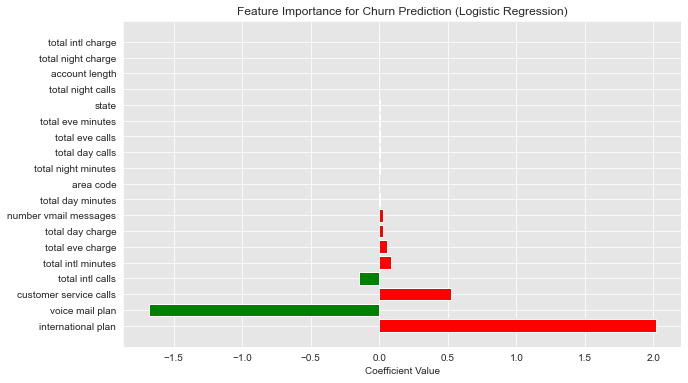

In [17]:
import matplotlib.pyplot as plt

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=['green' if x < 0 else 'red' for x in coef_df['Coefficient']])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Churn Prediction (Logistic Regression)')
plt.show()

The coefficients from the model tell us the direction and magnitude of each coefficient feature's influence on the probability of churn

Positive coefficients: Features with positive coefficients increases the likelihood of churn

Negative coefficients :Features with negative coefficients decreases the likelihood of churn

magnitude: The larger the absolute value of the coefficient the more significant the impact of the feature on churn.

# Calculate true positive rate(tpr) and false positive rate(fpr)

# Draw the ROC curve

In [19]:
# Import roc-curve, auc
 
from sklearn.metrics import roc_curve, auc

# calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# calculate the fpr, tpr and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test)

# calculate the fpr tpr,and thresholds for the test set
test_fpr, test_tpr, test_threshols = roc_curve(y_test, y_test_score)

Training AUC: 0.8036615206655694


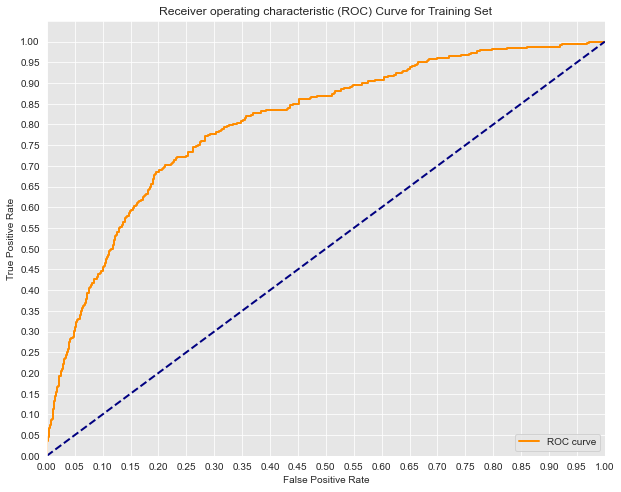

In [20]:
# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

The score of 0.8037 indicates that the model has the ability to distinguish between churn and non-churn customers during training.  this means there is approximately an 80.37% chance that the model will rank a randomly chosen positive instance(churn) higher than a randomly chosen negative instance(non-churn).


Test AUC: 0.7819157088122606



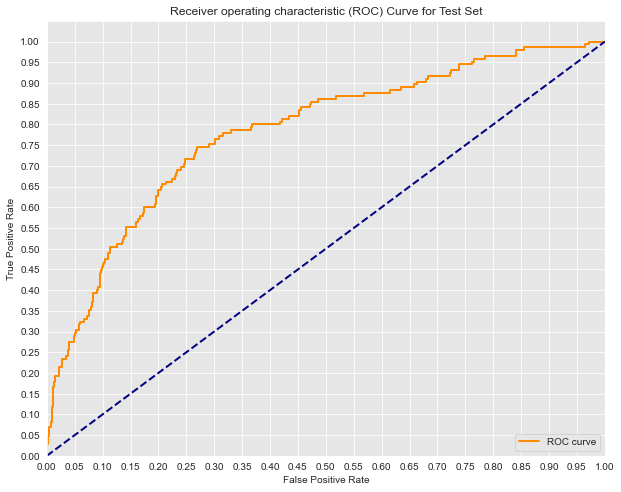

In [21]:
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('')
plt.show()

The score of 0.7819 reflects the models performance on unseen data. it is slightly lower than the training AUC but still indicates good performance.
It means there is approximately 78.19% chance that the model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance on the test set.

The AUC score suggests that logistic regression is a fit for the data. it has strong ability to distinguish between customers who churn and those who don't both on the training set and on the unseen test data. There is a slight drop in performance on the test set, it is within an acceptable range, indicating that the model is not overfitting and should perform well when deployed.